# I. ANN from Scratch

밑바닥부터 시작하는 딥러닝 1,2,3,4     교수님의 책 추천

In [ ]:
import numpy as np

In [ ]:
#Independent variables
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],
                      [0,1,0]])#Dependent variable
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1) #to convert labels to vector

In [ ]:
#Parameter
np.random.seed(42)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05 #learning rate

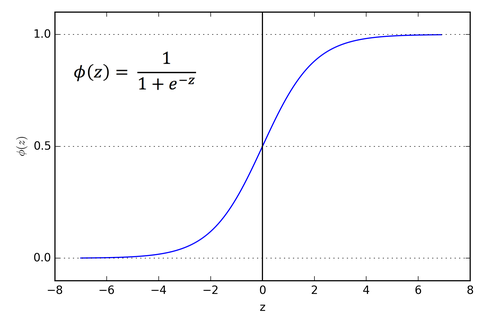

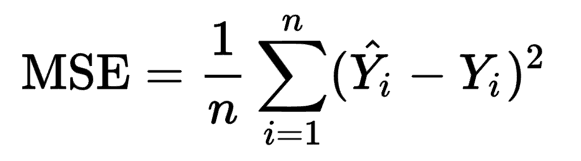

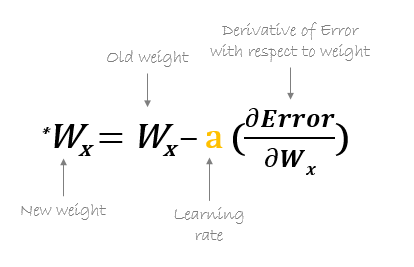

In [ ]:
#Activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [ ]:
#2000 epoch

for epoch in range(2000):
    inputs = input_set
#forward propagation
    XW = np.dot(inputs, weights)+ bias
    z = sigmoid(XW)

#error
    error = z - labels
    print(error.sum())

#역전파
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_set.T
#가중치 조정
    weights = weights - lr*np.dot(inputs, z_del)
    for num in z_del:
        bias = bias - lr*num

1.8806216715619812
1.8525640899325237
1.8243107340899896
1.7958847686438375
1.7673099081827413
1.7386103353186555
1.70981061515949
1.6809356068569574
1.6520103729182125
1.623060087002853
1.5941099409498616
1.5651850517915373
1.5363103695131097
1.5075105863073248
1.4788100480531448
1.4502326687170073
1.4218018483346397
1.3935403951819836
1.3654704526863837
1.3376134315651074
1.3099899476087358
1.282619765453504
1.2555217486106485
1.2287138159438014
1.202212904708781
1.1760349401952295
1.1501948119375935
1.1247063563951216
1.0995823459377747
1.074834483918001
1.0504734055578753
1.0265086843374711
1.0029488435338814
0.9798013725310017
0.957072747498054
0.9347684560195374
0.9128930252506302
0.8914500531694373
0.8704422425005396
0.8498714368923037
0.829738658942862
0.8100441496859043
0.790787409166752
0.7719672377610798
0.7535817779124228
0.7356285559897645
0.7181045239925073
0.7010061008564724
0.6843292131409233
0.6680693349025218
0.6522215265873573
0.6367804727964091
0.6217405188029252
0.

In [ ]:
#예측
single_pt = np.array([0,1,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.9122281]


#2. Tensor Flow로 ANN 연습

- 아래 내용을  sp500_tm.csv 파일에 적용!

1. 필요 패키지 불러오기

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

2. 데이터 전처리 연습

In [ ]:
df = pd.read_csv("creditset2.csv")

#데이터를 둘(각각 train, test)로 나눠주는 함수, test size 비율만큼 test에 해당하는 데이터의 크기
train_test_split([1,2,3,4], test_size=0.2)

#함수에 들어간 입력의 개수 X 2 만큼의 결과가 순서대로 나옴, train, test 각각
train_test_split(df, test_size=0.2)

#각각 다른 이름으로 할당시킬 수 있음
train_df, test_df = train_test_split(df, test_size=0.2)


#데이터프레임인 df에서 컬럼 선택: df[ [ 컬럼이름을 여기에  ]    ]
x = df[['income', 'age', 'loan']] #해당 컬럼 3개를 갖는 데이터프레임
y = df[['default10yr']] #해당 컬럼을 갖는 데이터프레임

#One hot encoding
y = to_categorical(df[['default10yr']]) #One hot encoding 시키기

#scaling
x = MinMaxScaler().fit_transform(x) #스케일링 시키기

3. 데이터 읽고 전처리까지 (분류모형의 경우)

In [ ]:
df = pd.read_csv("creditset2.csv")  # 1) 데이터 읽기
x = df[['income', 'age', 'loan']]   # 2) 변수 선택, x
y = to_categorical(df[['default10yr']]) #3) 변수 선택, target 범주형의 원핫인코딩
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2) #4) 파티셔닝
train_x = MinMaxScaler().fit_transform(train_x) #5)파티셔닝된 것 중 X의 스케일링
test_x = MinMaxScaler().fit_transform(test_x) #5)파티셔닝된 것 중 X의 스케일링

4. 모델링 및 적합

In [ ]:
#DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Hidden layer 구성하기
model = Sequential()
model.add(Dense(3, activation = 'relu', input_shape = (3, ))) #첫번째 은닉층, 3개입력->2개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(6, activation = 'relu')) #두번째 은닉층, 2개입력->6개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(2, activation = 'softmax')) #Desnse: 마지막 은닉층, Fully connected hidden layer, 분류의 경우 softmax

#모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc']) #분류모형은 이대로 사용하기
model.summary()

#모형 학습 및 가중치 확인
model.fit(train_x,train_y,epochs = 20)  #epoch수를 조정


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
50/50 [==============================] - 1s 3ms/step - loss: 0.4884 - acc: 0.8581
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.4227 - acc: 0.8581
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.3969 - acc: 0.8581
Epoch

5. 결과확인 및 평가

In [ ]:
#np.argmax
print( np.argmax( [1,10,100]) )

a = np.arange(6).reshape(2,3) + 10
print(a)
print(np.argmax(a, axis=0))#열에서 최대값, index
print(np.argmax(a, axis=1))#행에서 최대값, index 반환

2
[[10 11 12]
 [13 14 15]]
[1 1 1]
[2 2]


In [ ]:
predicted = model.predict( test_x)
predicted2 = np.argmax(predicted, axis=-1) # argmax 원핫 인코딩 원대로 하기 위해서
actual = np.argmax(test_y, axis=-1)

print("Accuracy:", np.mean(predicted2 == actual))


Accuracy: 0.9275


In [ ]:
model.summary()
print( model.get_weights() ) #가중치 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
[array([[-0.5092614 ,  0.7060958 , -0.02716669],
       [-1.0899689 ,  0.718363  , -0.27758577],
       [ 1.3789079 , -0.3581793 ,  0.8539818 ]], dtype=float32), array([ 0.42849433, -0.00488074, -0.01490956], dtype=float32), array([[ 1.5223528 , -0.7409276 , -0.34967428, -0.39777082, -0.46992132,
        -0.35032475],
    

In [ ]:
#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(actual, predicted2))


               precision    recall  f1-score   support

           0       0.94      0.97      0.96       336
           1       0.83      0.69      0.75        64

    accuracy                           0.93       400
   macro avg       0.89      0.83      0.85       400
weighted avg       0.92      0.93      0.92       400



# 아래부터 교수님이 주신 sp500_tm.csv로 뭔가 해보기

In [ ]:
# 필요 패키지 불러오기
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
# 데이터 전처리 연습
df = pd.read_csv("sp500_tm.csv")

#데이터를 둘(각각 train, test)로 나눠주는 함수, test size 비율만큼 test에 해당하는 데이터의 크기
train_test_split([1,2,3,4], test_size=0.2)

#함수에 들어간 입력의 개수 X 2 만큼의 결과가 순서대로 나옴, train, test 각각
train_test_split(df, test_size=0.2)

#각각 다른 이름으로 할당시킬 수 있음
train_df, test_df = train_test_split(df, test_size=0.2)


#데이터프레임인 df에서 컬럼 선택: df[ [ 컬럼이름을 여기에  ]    ]
x = df[['avgNeg', 'avgPos', 'avgTerms']] #해당 컬럼 3개를 갖는 데이터프레임
y = df[['Direction']] #해당 컬럼을 갖는 데이터프레임

#One hot encoding
y = to_categorical(df[['Direction']]) #One hot encoding 시키기

#scaling
x = MinMaxScaler().fit_transform(x) #스케일링 시키기

In [ ]:
# 데이터 읽고 전처리까지 (분류모형의 경우)
df = pd.read_csv("sp500_tm.csv")  # 1) 데이터 읽기
x = df[['avgNeg', 'avgPos', 'avgTerms']]   # 2) 변수 선택, x
y = to_categorical(df[['Direction']]) #3) 변수 선택, target 범주형의 원핫인코딩
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2) #4) 파티셔닝
train_x = MinMaxScaler().fit_transform(train_x) #5)파티셔닝된 것 중 X의 스케일링
test_x = MinMaxScaler().fit_transform(test_x) #5)파티셔닝된 것 중 X의 스케일링

In [ ]:
# 모델링 및 적합
#DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Hidden layer 구성하기
model = Sequential()
model.add(Dense(3, activation = 'relu', input_shape = (3, ))) #첫번째 은닉층, 3개입력->2개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(6, activation = 'relu')) #두번째 은닉층, 2개입력->6개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(2, activation = 'softmax')) #Desnse: 마지막 은닉층, Fully connected hidden layer, 분류의 경우 softmax

#모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc']) #분류모형은 이대로 사용하기
model.summary()

#모형 학습 및 가중치 확인
model.fit(train_x,train_y,epochs = 20)  #epoch수를 조정


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
3/3 [==============================] - 1s 12ms/step - loss: 0.6919 - acc: 0.5375
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6916 - acc: 0.5250
Epoch 3/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6910 - acc: 0.5375
Epoch 4/20

In [ ]:
# 결과 확인 및 평가
#np.argmax
print( np.argmax( [1,10,100]) )

a = np.arange(6).reshape(2,3) + 10
print(a)
print(np.argmax(a, axis=0))#열에서 최대값, index
print(np.argmax(a, axis=1))#행에서 최대값, index 반환

2
[[10 11 12]
 [13 14 15]]
[1 1 1]
[2 2]


In [ ]:
predicted = model.predict( test_x)
predicted2 = np.argmax(predicted, axis=-1) # argmax 원핫 인코딩 원대로 하기 위해서
actual = np.argmax(test_y, axis=-1)

print("Accuracy:", np.mean(predicted2 == actual))

1/1 [==============================] - 0s 34ms/step
Accuracy: 0.45


In [ ]:
model.summary()
print( model.get_weights() ) #가중치 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[array([[ 0.858031  , -0.40059307,  0.6623993 ],
       [-0.71235025,  0.2326854 ,  0.92312753],
       [-0.55736494,  0.7274386 , -0.49298376]], dtype=float32), array([-0.01007988, -0.00461895,  0.0167785 ], dtype=float32), array([[ 0.21900313, -0.2113244 , -0.4707371 , -0.77403444,

In [ ]:
#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(actual, predicted2))


               precision    recall  f1-score   support

           0       0.45      1.00      0.62         9
           1       0.00      0.00      0.00        11

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
